<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_groupby_NYCdeaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CST3512 `groupby()` Using  NYC Cause of Deaths    

##Housekeeping

Import the usual suspects    

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

Create a copy of the datafile from a `URL`    

In [3]:
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/NYC_Leading_Causes_of_Death_Dec-2022.csv" -o nyc_death_causes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  107k  100  107k    0     0   461k      0 --:--:-- --:--:-- --:--:--  461k


##Data Wrangling     

Read the datafile to a dataframe    

In [4]:
cd_df = pd.read_csv("nyc_death_causes.csv")

In [ ]:
cd_df.dtypes

In [ ]:
cd_df.head(24)

Clean up any commas, spaces, or periods in the `Deaths` column

In [5]:
cd_df["Deaths"] = cd_df.Deaths.str.replace(',', '')
cd_df["Deaths"] = cd_df.Deaths.str.replace(' ', '')
cd_df["Deaths"] = cd_df.Deaths.str.replace('.', '0')

<ipython-input-5-c6810d7e1a09>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cd_df["Deaths"] = cd_df.Deaths.str.replace('.', '0')


Convert `Deaths` to an integer value    

In [6]:
cd_df["Deaths"] = cd_df["Deaths"].astype('str').astype('int')

In [ ]:
cd_df.head(24)

In [ ]:
# Scaffolding to explore rows by Boolean search
# cd_df.loc[(cd_df["Year"] == 2019) & (cd_df["RaceEthnicity"] == "Other Race/ Ethnicity") & (cd_df["LeadingCause"] == "Septicemia (A40-A41)")]

Get categories of `LeadingCause`    

In [7]:
cd_df['LeadingCause'].unique()

array(['Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Diabetes Mellitus (E10-E14)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'All Other Causes',
       'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)',
       "Alzheimer's Disease (G30)",
       'Assault (Homicide: U01-U02, Y87.1, X85-Y09)',
       'Mental and Behavioral Disorders due to Use of Alcohol (F10)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Aortic Aneury

Create an enrichment DataFrame to merge into the existing DataFrame 

In [8]:
enrich_df = pd.DataFrame({
    'LeadingCause' : ['Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Diabetes Mellitus (E10-E14)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'All Other Causes',
       'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)',
       "Alzheimer's Disease (G30)",
       'Assault (Homicide: U01-U02, Y87.1, X85-Y09)',
       'Mental and Behavioral Disorders due to Use of Alcohol (F10)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Aortic Aneurysm and Dissection (I71)',
       'Viral Hepatitis (B15-B19)', 'Septicemia (A40-A41)',
       'Complications of Medical and Surgical Care (Y40-Y84, Y88)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Cholelithiasis and Disorders of Gallbladder (K80-K82)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)',
       'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
       'Anemias (D50-D64)', "Parkinson's Disease (G20)",
       'Peptic Ulcer (K25-K28)', 'Assault (Homicide: Y87.1, X85-Y09)',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Atherosclerosis (I70)', 'Tuberculosis (A16-A19)'],
    'Cause' : ['Heart',
       'Neoplasms',
       'Drug',
       'Diabetes',
       'Flu/Pneumonia',
       'Cerebrovascular',
       'Accidents',
       'Liver / Cirrhosis',
       'Respiratory',
       'Renal',
       'All Other',
       'Self-Harm',
       "Alzheimer's",
       'Homicide',
       'Alcohol',
       'Congenital',
       'Aortic',
       'Hepatitis', 'Septicemia',
       'Surgical',
       'HIV',
       'Cholelithiasis',
       'Perinatal',
       'Nephritis',
       'Neoplasms',
       'Anemias', 'Parkinsons',
       'Peptic Ulcer', 'Assault',
       'Accidents',
       'Self-Harm',
       'Liver / Cirrhosis',
       'Atherosclerosis', 'Tuberculosis'],
    'Type' : ['Other_Organ',
       'All_Other',
       'Drug',
       'Disease',
       'Disease',
       'Other_Organ',
       'Accident_Crime',
       'Liver_Cirrhosis',
       'Other_Organ',
       'Other_Organ',
       'All_Other',
       'Accident_Crime',
       "Other_Organ",
       'Accident_Crime',
       'Behavior',
       'All_Other',
       'Other_Organ',
       'Disease', 'Disease',
       'Accident_Crime',
       'Disease',
       'Disease',
       'All_Other',
       'Disease',
       'All_Other',
       'All_Other', 'Disease',
       'Behavior', 'Accident_Crime',
       'Accident_Crime',
       'Behavior',
       'Liver_Cirrhosis',
       'Disease', 'Disease']    
})

In [ ]:
enrich_df

Add labels to the existing DataFrame by merging in the enrichment data   

In [10]:
labeled_df = cd_df.merge(enrich_df)

In [11]:
labeled_df.groupby( [ "Year", "Type", "LeadingCause", "Cause", "Sex", "RaceEthnicity"] ).sum().reset_index()

,Year,Type,LeadingCause,Cause,Sex,RaceEthnicity,Deaths
0,2007,Accident_Crime,"Accidents Except Drug Posioning (V01-X39, X43,...",Accidents,F,Asian and Pacific Islander,32
1,2007,Accident_Crime,"Accidents Except Drug Posioning (V01-X39, X43,...",Accidents,F,Black Non-Hispanic,87
2,2007,Accident_Crime,"Accidents Except Drug Posioning (V01-X39, X43,...",Accidents,F,Hispanic,71
3,2007,Accident_Crime,"Accidents Except Drug Posioning (V01-X39, X43,...",Accidents,F,Not Stated/Unknown,0
4,2007,Accident_Crime,"Accidents Except Drug Posioning (V01-X39, X43,...",Accidents,F,Other Race/ Ethnicity,0
...,...,...,...,...,...,...,...
1245,2019,Other_Organ,Essential Hypertension and Renal Diseases (I10...,Renal,Male,Asian and Pacific Islander,56
1246,2019,Other_Organ,Essential Hypertension and Renal Diseases (I10...,Renal,Male,Hispanic,135
1247,2019,Other_Organ,Essential Hypertension and Renal Diseases (I10...,Renal,Male,Non-Hispanic Black,185
1248,2019,Other_Organ,Essential Hypertension and Renal Diseases (I10...,Renal,Male,Non-Hispanic White,181


Create a DataFrame of `Deaths` by `Year`, `Type`, and `Cause`   

In [12]:
cause_df = labeled_df[["Year", "Type", "Cause", "Deaths"]]

In [13]:
cause_df

,Year,Type,Cause,Deaths
0,2019,Other_Organ,Heart,1603
1,2019,Other_Organ,Heart,731
2,2019,Other_Organ,Heart,4034
3,2019,Other_Organ,Heart,2315
4,2019,Other_Organ,Heart,66
...,...,...,...,...
1267,2013,Liver_Cirrhosis,Liver / Cirrhosis,0
1268,2009,Disease,Atherosclerosis,0
1269,2007,Disease,Atherosclerosis,0
1270,2010,Disease,Atherosclerosis,0


##Plotting   

###Create a pie chart of causes of death for the entire dataset    

In [14]:
type_df = cause_df.groupby(by=["Type"]).sum()
del type_df['Year']

In [15]:
type_df

,Deaths
Type,
Accident_Crime,11018
All_Other,208676
Behavior,2107
Disease,42948
Drug,5804
Liver_Cirrhosis,1694
Other_Organ,207310


In [16]:
explode_lst = [0, 0, 0, 0, 0, 0.85, 0]

<ipython-input-17-eee8e57cdd0d>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(type_df, labels=type_df.index, explode=explode_lst, shadow=True, autopct='%1.1f%%')


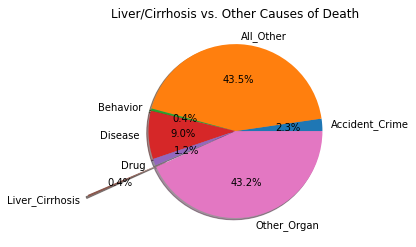

In [17]:
# draw a pie chart with labels, percentages, and the 6th slice exploded
plt.pie(type_df, labels=type_df.index, explode=explode_lst, shadow=True, autopct='%1.1f%%')

# display the title
plt.title("Liver/Cirrhosis vs. Other Causes of Death")

# show (or save) the plot
plt.show()

###Create a stacked area chart of the causes of death over time    

Reset the index and then index on `Year`   

In [35]:
cause_df = cause_df.reset_index()

In [36]:
cause_df = cause_df.set_axis(cause_df["Year"])

In [ ]:
cause_df

Unpivot the DataFrame to have values by `Type` for each `Year`   

In [38]:
# function to unpivot the dataframe
type_time_df = cause_df.melt(id_vars =['Year','Deaths'], value_vars =['Type'])

In [39]:
type_time_df.rename(columns = {'value':'Type'}, inplace = True)

In [40]:
del type_time_df["variable"]

In [ ]:
type_time_df

In [42]:
type_time_df.set_index("Year")

,Deaths,Type
Year,,
2019,1603,Other_Organ
2019,731,Other_Organ
2019,4034,Other_Organ
2019,2315,Other_Organ
2019,66,Other_Organ
...,...,...
2013,0,Liver_Cirrhosis
2009,0,Disease
2007,0,Disease


Stack the values by `Type` to produce a sub-total for each `Year`   

In [43]:
type_stack_df = type_time_df.groupby(by=["Year", "Type"]).sum()

In [44]:
type_stack_df

Deaths
Year Type                   
2007 Accident_Crime     1408
     All_Other         21391
     Behavior            250
     Disease            4994
     Drug                704
...                      ...
2019 Behavior             21
     Disease            3625
     Drug               1520
     Liver_Cirrhosis     189
     Other_Organ       23669

[63 rows x 1 columns]

Set the index as `Year`    

In [45]:
type_stack_df.reset_index(inplace=True, level = ['Type'])

In [46]:
type_stack_df

,Type,Deaths
Year,,
2007,Accident_Crime,1408
2007,All_Other,21391
2007,Behavior,250
2007,Disease,4994
2007,Drug,704
...,...,...
2019,Behavior,21
2019,Disease,3625
2019,Drug,1520


Pivot the `Deaths` values into separate columns for each `Type`   

In [47]:
# Organize the data with each Type of cause of death as a column  
type_plot_df = type_stack_df.pivot_table(values='Deaths', index=type_stack_df.index, columns='Type', aggfunc='first')

In [48]:
type_plot_df

Type,Accident_Crime,All_Other,Behavior,Disease,Drug,Liver_Cirrhosis,Other_Organ
Year,,,,,,,
2007,1408,21391,250,4994,704,125,25124
2008,1336,21627,251,4959,498,212,25255
2009,1187,21627,243,4864,505,146,24248
2010,1164,22911,250,5077,355,168,22580
2011,1016,23868,252,5007,683,172,21728
2012,1207,24145,280,4736,452,217,21383
2013,1122,24467,273,5007,564,194,21760
2014,1129,24554,287,4679,523,271,21563
2019,1449,24086,21,3625,1520,189,23669


Create a list of the column names    

In [51]:
type_lst = list(type_plot_df.columns)

In [52]:
type_lst

['Accident_Crime',
 'All_Other',
 'Behavior',
 'Disease',
 'Drug',
 'Liver_Cirrhosis',
 'Other_Organ']

Create a list of the `Year` (index) values    

In [49]:
year_lst = list(type_plot_df.index)

In [50]:
year_lst

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2019]

Produce a stacked area chart of the types of causes of death over the years   

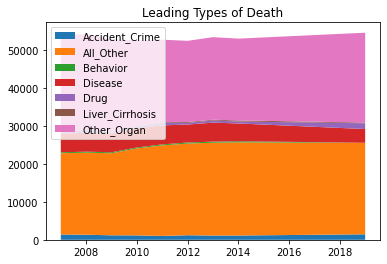

In [57]:
fig, ax = plt.subplots()

ax.stackplot(year_lst, 
              type_plot_df['Accident_Crime'],
              type_plot_df['All_Other'],
              type_plot_df['Behavior'],
              type_plot_df['Disease'],
              type_plot_df['Drug'],
              type_plot_df['Liver_Cirrhosis'],
              type_plot_df['Other_Organ'],
              labels=type_lst)    

ax.legend(loc='upper left')
ax.set_title('Leading Types of Death')

plt.show()

That last `.stackplot()` code can be shortened by using the `.T` attribute on the DataFrame; then there is no need to type every column name as a parameter to `.stackplot()`  

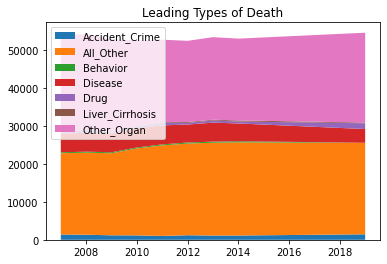

In [100]:
fig, ax = plt.subplots()

ax.stackplot(year_lst, 
              type_plot_df.T,
              labels=type_lst)    

ax.legend(loc='upper left')
ax.set_title('Leading Types of Death')

plt.show()

***

#Example of **Matplotlib** `.stackplot()`  

This section of the notebook demonstrates the concepts behind stacked area plots (`.stackplot()`) in **Matplotlib**    

The demonstrations begins with the creation of some simple iterables (a range, and lists) then moves into the application of the same concepts using a DataFrame.    


In [ ]:
# Create data
x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]

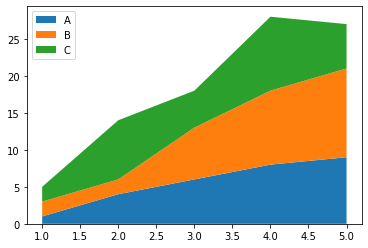

In [34]:
# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left') 

plt.show()

In [18]:
# create a DataFrame `df`    

x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]

df = pd.DataFrame({
    'x' : x,
    'A' : y1,
    'B' : y2,
    'C' : y3
})
df = df.set_index('x')  

In [19]:
df

,A,B,C
x,,,
1,1,2,2
2,4,2,8
3,6,7,5
4,8,10,10
5,9,12,6


Use the `df` DataFrame `index` as the x axis    

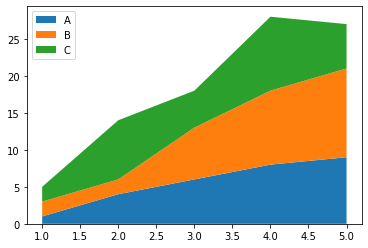

In [33]:
# Basic stacked area chart.
plt.stackplot(df.index, y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')

plt.show()

Use the `df` DataFrame `index` as the x axis and `df['A']` for the first Series      

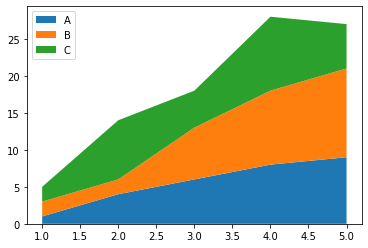

In [32]:
# Basic stacked area chart.
plt.stackplot(df.index, df['A'], y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')

plt.show()

Use the df DataFrame index as the x axis and `df['A']`, `df['B']`, `df['C']` for the Series

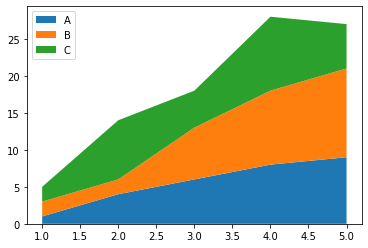

In [31]:
# Basic stacked area chart.
plt.stackplot(df.index, df['A'], df['B'], df['C'], labels=['A','B','C'])
plt.legend(loc='upper left')

plt.show()

Use the df DataFrame index as the x axis and `df['A']`, `df['B']`, `df['C']` for the Series without a `labels=`

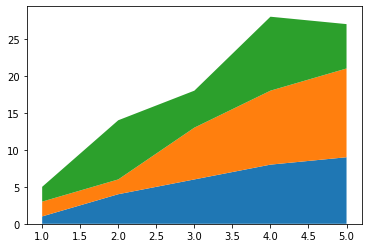

In [30]:
# Basic stacked area chart.
plt.stackplot(df.index, df['A'], df['B'], df['C'])
# plt.legend(loc='upper left')

plt.show()

Create a list of the columns names and use that list for `labels=`  

In [27]:
labels_lst = list(df.columns)
print(labels_lst)

['A', 'B', 'C']


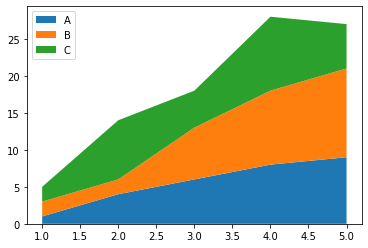

In [29]:
# Basic stacked area chart.
plt.stackplot(df.index, df['A'], df['B'], df['C'], labels=labels_lst)
plt.legend(loc='upper left')

plt.show()

Using `.iloc()` for a column Series

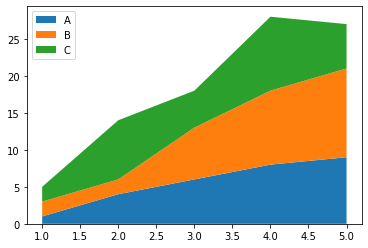

In [90]:
# Basic stacked area chart.
plt.stackplot(df.index, df.iloc[:,0], df['B'], df['C'], labels=labels_lst)
plt.legend(loc='upper left')

plt.show()

However, using `.iloc()` for an array of several column Series throws an error unless the `.T` attribute is used   

In [94]:
df.iloc[:, 0:3]

,A,B,C
x,,,
1,1,2,2
2,4,2,8
3,6,7,5
4,8,10,10
5,9,12,6


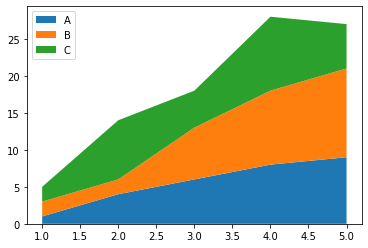

In [98]:
# Basic stacked area chart.
# plt.stackplot(df.index, df.iloc[:,0:3], labels=labels_lst)  # this would throw an error
plt.stackplot(df.index, df.iloc[:,0:3].T, labels=labels_lst)  # this does not throw an error 
plt.legend(loc='upper left')

plt.show()

And trying to use the entire DataFrame throws a similar error **unless** you use the `.T` attribute on the DataFrame name.  


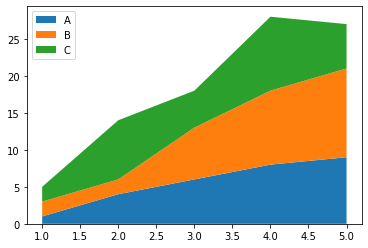

In [99]:
# Basic stacked area chart.
# plt.stackplot(df.index, df, labels=labels_lst) # this would throw an error 
plt.stackplot(df.index, df.T, labels=labels_lst) # this does not throw an error 
plt.legend(loc='upper left')

plt.show()

---